In [5]:
import csv

data = [
    [79, 1.80, 35, 'Male'],
    [69, 1.68, 39, 'Male'],
    [73, 1.82, 25, 'Male'],
    [95, 1.70, 60, 'Male'],
    [82, 1.87, 27, 'Male'],
    [55, 1.55, 18, 'Female'],
    [69, 1.50, 89, 'Female'],
    [71, 1.78, 42, 'Female'],
    [64, 1.67, 16, 'Female'],
    [69, 1.64, 52, 'Female'],
]

headers = ['weight', 'height', 'age', 'gender']

with open('people_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers)
    writer.writerows(data)

Root Mean Squared Error (RMSE): 18.994190177334854


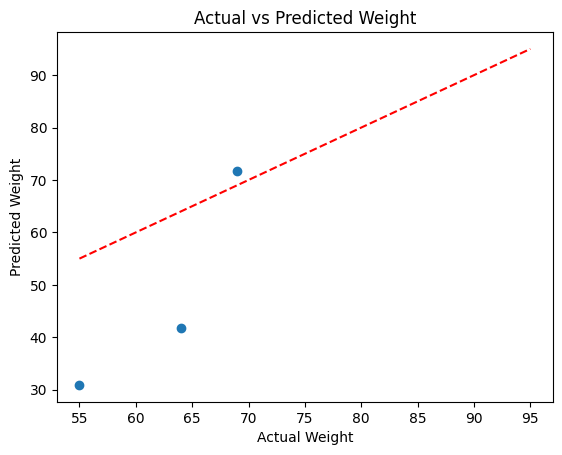

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('people_data.csv')

df['age'] = df['age'].fillna(df['age'].mean())
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

X = df[['height', 'age', 'gender']]
y = df['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
